#Datos meteorológicos
TFM - Vanessa Rodríguez Horcajo

En este notebook se recogen todas las funciones definidas y pruebas ejecutadas para el procesamiento de los datos meteorológicos.

Se debe tener en cuenta que con el objetivo de posibilitar la comparativa con los datos recogidos por las motas sensoras del aula 3304, los datos recogidos por las motas sensoras del aula 3301 y las respuestas procedentes de los cuestionarios de bienestar rellenados por parte de los alumnos, los datos de interés son aquellos recogidos durante los meses de noviembre a marzo, el mismo periodo de tiempo durante el cual se almacenaron datos para el resto de conjuntos de datos previamente mencionados. De esta manera, para facilitar el procesamiento de las mediciones meteorológicas, todos los datos a procesar se encuentran almacenados en Google Drive en cinco archivos csv diferentes, uno por cada mes de interés.
Estos datos han sido obtenidos en el [Portal de datos abiertos del Ayuntamiento de Madrid](https://datos.madrid.es/portal/site/egob/menuitem.3efdb29b813ad8241e830cc2a8a409a0/?vgnextoid=4950cc720ba29610VgnVCM2000001f4a900aRCRD&vgnextchannel=102612b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default).

In [ ]:
import os
from google.colab import drive
import pandas as pd
from datetime import datetime, timedelta
from IPython.display import Image
import re


Acceso a Google Drive para la carga de los datos

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
carpeta_drive = '/content/drive/My Drive/TFM/InfoMet'

In [ ]:
datos_met = os.listdir(carpeta_drive)
datos_met

['nov_meteo23.csv',
 'dic_meteo23.csv',
 'ene_meteo24.csv',
 'feb_meteo24.csv',
 'mar_meteo24.csv']

## Entendimiento de los datos

Antes de comenzar con el procesamiento de los datos, es importante conocer qué datos se almacenan y qué estructura presentan. Los datos meteorológicos obtenidos en el Portal de datos abiertos del Ayuntamiento de Madrid presentan una periodicidad de 1h. Para cada una de las muestras recogidas, se dispone de la siguiente información:

*   `Provincia`: código de la provincia de la muestra. En este caso, todas las muestras presentarán el código de Madrid.
*   `Municipio`: código del municipio de la muestra.
*   `Estación`: código de la estación meteorológica que recogió la muestra.
*   `Magnitud`: código de magnitud de la medición de la muestra.
*   `Punto_muestreo`: combinación de la provincia, municipio, estación, magnitud y técnica de medición de la muestra.
*   `Año`: año de recogida de la muestra.
*   `Mes`: mes de recogida de la muestra.
*   `Día`: día de recogida de la muestra.
*   `Pares de columnas H-V`: Hora y validación de la medición en la hora H. Existen 24 pares columnas H-V, uno por cada hora de muestro a lo largo del día. En la columna H, se recoge el valor medido para la magnitud correspondiente, y en la columna V, si dicha medición ha sido validada.

De esta manera, en este contexto, cada muestra debe ser entendida como las mediciones realizadas a lo largo de un día concreto para cada hora junto con la correspondiente validación de dicha medición para unos códigos de provincia, municipio, estación y magnitud determinados.


Para realizar un correcto filtrado de los datos, es necesario conocer los códigos de las magnitudes y estaciones meteorológicas de interés. En este caso, respecto a las magnitudes medidas, se dispone de la siguiente tabla de equivalencia:

| Código | Magnitud | Unidad de madida | Técnica de medida |
|-----------|-----------|-----------|-----------|
| 80    | Radiación ultravioleta    | Mw/m2    | 98    |
| 81    | Velocidad del viento   | ms   | 98    |
| 82    | Dirección del viento    | -    | 98    |
| **83**    | **Temperatura**    | **ºC**    | **98**    |
| **86**    | **Humedad relativa**    | **%**    | **98**    |
| 87    | Precisión bariométrica    | mb    | 98    |
| 88    | Radiación solar    | W/m2    | 98    |
| 89    | Precipitación    | l/m2    | 98    |

Por otro lado, respecto a las estaciones meteorológicas, es imprescindible identificar la estación más cercana a la ubicación de las motas sensoras para aumentar la fiabilidad de la comparativa que se busca realizar con los datos de las mismas. Las motas sensoras se encuentran ubicadas en la [Universidad Politécnica de Madrid (UPM) - Campus Sur](https://www.upm.es/). Así, la estación meteorológica más cercana a este punto de referencia es la estación ***Estación J.M.D. Moratalaz*** con código ***102***.







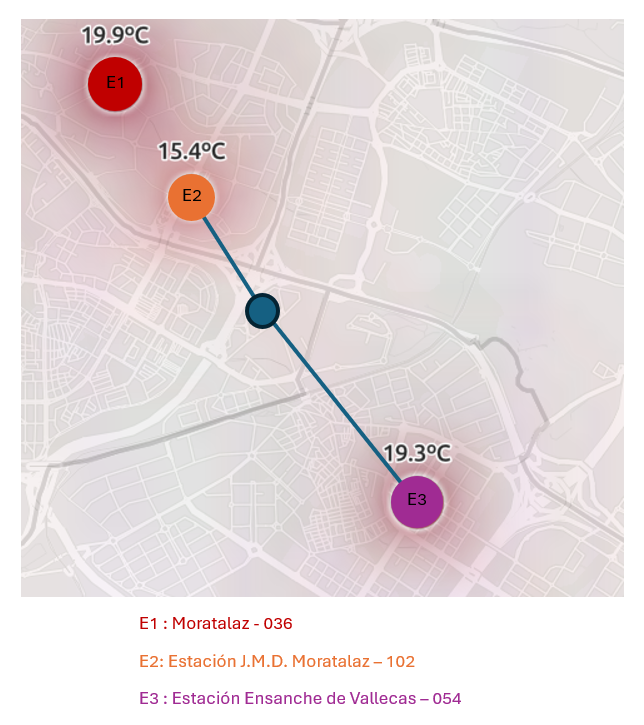

In [ ]:
Image(filename='estaciones.png')

### Datos de noviembre

In [ ]:
ruta = '/content/drive/My Drive/TFM/InfoMet/nov_meteo23.csv'
datos_met_nov = pd.read_csv(ruta, sep=';')
datos_met_nov

,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,ANO,MES,DIA,H01,V01,...,H20,V20,H21,V21,H22,V22,H23,V23,H24,V24
0,28,79,102,81,28079102_81_98,2023,11,1,0.50,V,...,4.90,V,4.65,V,3.77,V,4.30,V,3.93,V
1,28,79,102,81,28079102_81_98,2023,11,2,4.13,V,...,6.57,V,3.60,V,3.55,V,3.80,V,3.70,V
2,28,79,102,81,28079102_81_98,2023,11,3,2.42,V,...,2.90,V,3.08,V,2.20,V,3.58,V,3.05,V
3,28,79,102,81,28079102_81_98,2023,11,4,3.30,V,...,5.15,V,4.57,V,4.40,V,4.85,V,4.07,V
4,28,79,102,81,28079102_81_98,2023,11,5,3.28,V,...,2.95,V,3.02,V,1.87,V,2.17,V,2.42,V
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2722,28,79,59,89,28079059_89_98,2023,11,26,0.00,V,...,0.00,V,0.00,V,0.00,V,0.00,V,0.00,V
2723,28,79,59,89,28079059_89_98,2023,11,27,0.00,V,...,0.00,V,0.00,V,0.00,V,0.00,V,0.00,V
2724,28,79,59,89,28079059_89_98,2023,11,28,0.00,V,...,0.00,V,0.00,V,0.00,V,0.00,V,0.00,V
2725,28,79,59,89,28079059_89_98,2023,11,29,0.00,V,...,0.00,V,0.00,V,0.00,V,0.00,V,0.00,V


Partimos de un conjunto de datos con un total de 2727 muestras. En primer lugar, se realiza un filtrado de estos datos para recuperar aquellos que contengan mediciones de las magnitudes de interés: Temperatura (código 83) y Humedad (código 86).

In [ ]:
datos_met_nov = datos_met_nov[datos_met_nov['MAGNITUD'].isin([83,86])]
datos_met_nov.shape

(1370, 56)

In [ ]:
valores_unicos = datos_met_nov['MAGNITUD'].unique()
print(valores_unicos)

[83 86]


A continuación, filtramos por la estación de meteorología de interés y comprobamos si existe alguna medición no validada en el conjunto de datos. Como puede observarse, hay 60 filas con algún valor no validado.

In [ ]:
datos_met_nov = datos_met_nov[datos_met_nov['ESTACION'] == 102]
datos_met_nov.shape

(60, 56)

In [ ]:
df_filtradoN = datos_met_nov[datos_met_nov.eq('N').any(axis=1)]
print(f"El dataset tiene {df_filtradoN.shape[0]} filas con algún valor no validado")

El dataset tiene 60 filas con algún valor no validado


### Datos de diciembre

In [ ]:
ruta = '/content/drive/My Drive/TFM/InfoMet/dic_meteo23.csv'
datos_met_dic = pd.read_csv(ruta, sep=';')
datos_met_dic

,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,ANO,MES,DIA,H01,V01,...,H20,V20,H21,V21,H22,V22,H23,V23,H24,V24
0,28,79,102,81,28079102_81_98,2023,12,1,2.25,V,...,2.60,V,1.75,V,2.08,V,4.33,V,2.85,V
1,28,79,102,81,28079102_81_98,2023,12,2,1.67,V,...,0.80,V,1.15,V,1.37,V,2.15,V,1.73,V
2,28,79,102,81,28079102_81_98,2023,12,3,0.57,V,...,1.22,V,1.73,V,1.73,V,1.20,V,1.10,V
3,28,79,102,81,28079102_81_98,2023,12,4,0.78,V,...,1.25,V,1.28,V,1.13,V,1.65,V,2.17,V
4,28,79,102,81,28079102_81_98,2023,12,5,1.58,V,...,1.17,V,1.47,V,1.87,V,1.77,V,2.10,V
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2907,28,79,59,89,28079059_89_98,2023,12,27,0.00,V,...,0.00,V,0.00,V,0.00,V,0.00,V,0.00,V
2908,28,79,59,89,28079059_89_98,2023,12,28,0.00,V,...,0.00,V,0.00,V,0.00,V,0.00,V,0.00,V
2909,28,79,59,89,28079059_89_98,2023,12,29,0.00,V,...,0.00,V,0.00,V,0.00,V,0.00,V,0.00,V
2910,28,79,59,89,28079059_89_98,2023,12,30,0.00,V,...,0.00,V,0.00,V,0.00,V,0.00,V,0.00,V


Partimos de un conjunto de datos con un total de 2912 muestras. En primer lugar, se realiza un filtrado de estos datos para recuperar aquellos que contengan mediciones de las magnitudes de interés: Temperatura (código 83) y Humedad (código 86).

In [ ]:
datos_met_dic = datos_met_dic[datos_met_dic['MAGNITUD'].isin([83,86])]
datos_met_dic.shape

(1486, 56)

In [ ]:
valores_unicos = datos_met_dic['MAGNITUD'].unique()
print(valores_unicos)

[83 86]


A continuación, filtramos por la estación de meteorología de interés y comprobamos si existe alguna medición no validada en el conjunto de datos. Como puede observarse, hay 16 filas con algún valor no validado.

In [ ]:
datos_met_dic = datos_met_dic[datos_met_dic['ESTACION'] == 102]
datos_met_dic.shape

(62, 56)

In [ ]:
df_filtrado = datos_met_dic[datos_met_dic.eq('N').any(axis=1)]
print(f"El dataset tiene {df_filtrado.shape[0]} filas con algún valor no validado")

El dataset tiene 16 filas con algún valor no validado


### Datos de enero

In [ ]:
ruta = '/content/drive/My Drive/TFM/InfoMet/ene_meteo24.csv'
datos_met_en = pd.read_csv(ruta, sep=';')
datos_met_en

,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,ANO,MES,DIA,H01,V01,...,H20,V20,H21,V21,H22,V22,H23,V23,H24,V24
0,28,79,102,81,28079102_81_98,2024,1,1,0.62,V,...,1.25,V,0.80,V,0.50,V,0.98,V,0.97,V
1,28,79,102,81,28079102_81_98,2024,1,2,0.42,V,...,0.47,V,0.38,V,0.58,V,0.92,V,1.43,V
2,28,79,102,81,28079102_81_98,2024,1,3,1.38,V,...,1.27,V,0.78,V,0.73,V,0.62,V,0.63,V
3,28,79,102,81,28079102_81_98,2024,1,4,0.98,V,...,1.02,V,1.35,V,1.35,V,1.42,V,1.50,V
4,28,79,102,81,28079102_81_98,2024,1,5,1.45,V,...,2.38,V,2.53,V,2.07,V,4.00,V,4.57,V
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2893,28,79,59,89,28079059_89_98,2024,1,27,0.00,V,...,0.00,V,0.00,V,0.00,V,0.00,V,0.00,V
2894,28,79,59,89,28079059_89_98,2024,1,28,0.00,V,...,0.00,V,0.00,V,0.00,V,0.00,V,0.00,V
2895,28,79,59,89,28079059_89_98,2024,1,29,0.00,V,...,0.00,V,0.00,V,0.00,V,0.00,V,0.00,V
2896,28,79,59,89,28079059_89_98,2024,1,30,0.00,V,...,0.00,V,0.00,V,0.00,V,0.00,V,0.00,V


Partimos de un conjunto de datos con un total de 2898 muestras. En primer lugar, se realiza un filtrado de estos datos para recuperar aquellos que contengan mediciones de las magnitudes de interés: Temperatura (código 83) y Humedad (código 86).

In [ ]:
datos_met_en = datos_met_en[datos_met_en['MAGNITUD'].isin([83,86])]
datos_met_en.shape

(1472, 56)

In [ ]:
valores_unicos = datos_met_en['MAGNITUD'].unique()
print(valores_unicos)

[83 86]


A continuación, filtramos por la estación de meteorología de interés y comprobamos si existe alguna medición no validada en el conjunto de datos. Como puede observarse, hay 14 filas con algún valor no validado.

In [ ]:
datos_met_en = datos_met_en[datos_met_en['ESTACION'] == 102]
datos_met_en.shape

(62, 56)

In [ ]:
df_filtrado = datos_met_en[datos_met_en.eq('N').any(axis=1)]
print(f"El dataset tiene {df_filtrado.shape[0]} filas con algún valor no validado")

El dataset tiene 14 filas con algún valor no validado


### Datos de febrero

In [ ]:
ruta = '/content/drive/My Drive/TFM/InfoMet/feb_meteo24.csv'
datos_met_feb = pd.read_csv(ruta, sep=';')
datos_met_feb

,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,ANO,MES,DIA,H01,V01,...,H20,V20,H21,V21,H22,V22,H23,V23,H24,V24
0,28,79,102,81,28079102_81_98,2024,2,1,1.00,V,...,1.32,V,1.33,V,0.73,V,1.15,V,1.40,V
1,28,79,102,81,28079102_81_98,2024,2,2,0.65,V,...,0.85,V,1.22,V,1.55,V,1.37,V,1.47,V
2,28,79,102,81,28079102_81_98,2024,2,3,1.85,V,...,0.87,V,1.05,V,1.10,V,1.38,V,1.75,V
3,28,79,102,81,28079102_81_98,2024,2,4,1.37,V,...,0.73,V,0.83,V,1.15,V,0.77,V,0.95,V
4,28,79,102,81,28079102_81_98,2024,2,5,1.10,V,...,0.60,V,0.73,V,0.53,V,0.33,V,0.37,V
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2633,28,79,59,89,28079059_89_98,2024,2,25,0.00,V,...,0.00,V,0.00,V,0.00,V,0.05,V,0.10,V
2634,28,79,59,89,28079059_89_98,2024,2,26,0.00,V,...,0.00,V,0.00,V,0.00,V,0.00,V,0.00,V
2635,28,79,59,89,28079059_89_98,2024,2,27,0.00,V,...,0.00,V,0.00,V,0.00,V,0.00,V,0.00,V
2636,28,79,59,89,28079059_89_98,2024,2,28,0.00,V,...,0.00,V,0.00,V,0.00,V,0.00,V,0.00,V


Partimos de un conjunto de datos con un total de 2638 muestras. En primer lugar, se realiza un filtrado de estos datos para recuperar aquellos que contengan mediciones de las magnitudes de interés: Temperatura (código 83) y Humedad (código 86).

In [ ]:
datos_met_feb = datos_met_feb[datos_met_feb['MAGNITUD'].isin([83,86])]
datos_met_feb.shape

(1324, 56)

In [ ]:
valores_unicos = datos_met_feb['MAGNITUD'].unique()
print(valores_unicos)

[83 86]


A continuación, filtramos por la estación de meteorología de interés y comprobamos si existe alguna medición no validada en el conjunto de datos. Como puede observarse, no hay filas con valores no validados.

In [ ]:
datos_met_feb = datos_met_feb[datos_met_feb['ESTACION'] == 102]
datos_met_feb.shape

(58, 56)

In [ ]:
df_filtrado = datos_met_feb[datos_met_feb.eq('N').any(axis=1)]
print(f"El dataset tiene {df_filtrado.shape[0]} filas con algún valor no validado")

El dataset tiene 0 filas con algún valor no validado


### Datos de marzo

In [ ]:
ruta = '/content/drive/My Drive/TFM/InfoMet/mar_meteo24.csv'
datos_met_mar = pd.read_csv(ruta, sep=';')
datos_met_mar

,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,ANO,MES,DIA,H01,V01,...,H20,V20,H21,V21,H22,V22,H23,V23,H24,V24
0,28,79,102,81,28079102_81_98,2024,3,1,2.35,V,...,2.50,V,2.27,V,1.98,V,2.25,V,3.57,V
1,28,79,102,81,28079102_81_98,2024,3,2,2.88,V,...,1.52,V,2.78,V,2.58,V,2.03,V,4.10,V
2,28,79,102,81,28079102_81_98,2024,3,3,4.38,V,...,3.72,V,1.73,V,2.07,V,3.08,V,3.82,V
3,28,79,102,81,28079102_81_98,2024,3,4,1.80,V,...,3.12,V,2.40,V,1.47,V,3.05,V,3.07,V
4,28,79,102,81,28079102_81_98,2024,3,5,1.27,V,...,1.67,V,0.82,V,0.72,V,1.17,V,0.73,V
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2883,28,79,59,89,28079059_89_98,2024,3,27,0.10,V,...,0.15,V,0.25,V,0.00,V,0.00,V,0.00,V
2884,28,79,59,89,28079059_89_98,2024,3,28,0.00,V,...,0.00,V,0.00,V,3.45,V,1.35,V,0.25,V
2885,28,79,59,89,28079059_89_98,2024,3,29,0.05,V,...,0.00,V,0.00,V,0.00,V,0.00,V,0.00,V
2886,28,79,59,89,28079059_89_98,2024,3,30,0.00,V,...,0.10,V,0.00,V,0.00,V,0.05,V,2.20,V


Partimos de un conjunto de datos con un total de 2888 muestras. En primer lugar, se realiza un filtrado de estos datos para recuperar aquellos que contengan mediciones de las magnitudes de interés: Temperatura (código 83) y Humedad (código 86).

In [ ]:
datos_met_mar = datos_met_mar[datos_met_mar['MAGNITUD'].isin([83,86])]
datos_met_mar.shape

(1464, 56)

In [ ]:
valores_unicos = datos_met_mar['MAGNITUD'].unique()
print(valores_unicos)

[83 86]


A continuación, filtramos por la estación de meteorología de interés y comprobamos si existe alguna medición no validada en el conjunto de datos. Como puede observarse, hay 4 filas con valores no validados.

In [ ]:
datos_met_mar = datos_met_mar[datos_met_mar['ESTACION'] == 102]
datos_met_mar.shape

(62, 56)

In [ ]:
df_filtrado = datos_met_mar[datos_met_mar.eq('N').any(axis=1)]
print(f"El dataset tiene {df_filtrado.shape[0]} filas con algún valor no validado")

El dataset tiene 4 filas con algún valor no validado


## Procesamiento de los datos

Una vez analizados los datos meteorológicos, es posible definir la función principal encargada de su tratamiento. Esta tarea se dividirá en dos subtareas principales:


1.  S1: Procesamiento, limpieza y unificación de los datos de cada uno de los meses de manera individual. Esta subtarea dará como resultado un DataFrame auxilar `df_final` que será recibido como entrada por la siguiente subtarea.
2.  S2: Reestructuración de los datos para adoptar el mismo formato que el resto de conjuntos de datos con los que se busca relacionar y comparar los datos meteorológicos.



### S1: Obtención del DataFrame base

La primera subatrea está constituida por la función `get_dataframe_mes`. Esta función es la encargada de, para cada uno de los meses de noviembre a marzo, filtrar los datos por los códigos de magnitud y estación meteorológica de interés y unificar los conjuntos de datos de todos los meses. Recibe como parámetros los archivos de los datos, la carpeta donde se encuentran dichos archivos, el conjunto de magnitudes de interés y la lista de columnas a eliminar del DataFrame original. Funciona de la siguiente manera:

1. Crea el DataFrame final resultado de la función. Al inicio, está vacío.

2.   Para cada uno de los archivos de cada mes:

     1.1 Lee los datos del archivo y elabora un DataFrame del mes.

     1.2 Filtra los datos por la estación meteorológica y  magnitudes deseadas.

     1.3 Elabora una nueva columna `Date` mediante la concatenación de las columnas de día, mes y año de los datos originales. Esta nueva columna tiene el formato d/m/Y.

     1.4 Añade el DataFrame del mes al DataFrame final mediante la concatenación de ambos.

2.   Elimina las columnas no deseadas del DataFrame final.


El DataFrame final resultante presenta la siguiente información para cada una de las muestras recogidas:

* Magnitud de la muestra.
* Fecha de la muestra con formato d/m/Y.
* Conjunto de 24 pares de columnas H-V.









In [ ]:
def get_dataframe_mes(datos_meteo, carpeta_archivos, conjunto_valores_deseados, columnas_a_eliminar):

  df_meteo = pd.DataFrame()

  for nombre_archivo in datos_meteo:

    ruta_completa = os.path.join(carpeta_archivos, nombre_archivo)

    df_aux = pd.read_csv(ruta_completa, sep=';')

    df_aux = df_aux[df_aux['MAGNITUD'].isin(conjunto_valores_deseados)]

    df_aux = df_aux[df_aux['ESTACION'] == 102]

    df_aux['Date'] = df_aux.apply(lambda row: f"{row['DIA']}/{row['MES']}/{row['ANO']}", axis=1)

    df_meteo = pd.concat([df_meteo, df_aux], ignore_index=True)

    df_meteo = df_meteo.drop(columnas_a_eliminar, axis=1)


  return df_meteo

Función auxiliar `obtener_fecha`: Función encargada de, dado el nombre de un archivo, obtener una representación numérica del mismo con el objetivo de usar esa clave para su ordenación posterior. Recibe como párametro el nombre del archivo.

In [ ]:
def obtener_fecha(archivo):
  meses = {
    'ene': 1,
    'feb': 2,
    'mar': 3,
    'abr': 4,
    'may': 5,
    'jun': 6,
    'jul': 7,
    'ago': 8,
    'sep': 9,
    'oct': 10,
    'nov': 11,
    'dic': 12
  }
  nombre_mes, año = archivo.split('_')[0], archivo.split('_')[1].split('.')[0][5:7]
  numero_mes = meses[nombre_mes]
  fecha = numero_mes + int(año)*100
  return fecha

In [ ]:
magnitudes = [83,86]
carpeta_drive = '/content/drive/My Drive/TFM/InfoMet'
datos_met = sorted(os.listdir(carpeta_drive),key=obtener_fecha)
col_eliminar = ['PROVINCIA', 'MUNICIPIO', 'ESTACION', 'PUNTO_MUESTREO', 'ANO', 'MES', 'DIA']


df_final = get_dataframe_mes(datos_met, carpeta_drive, magnitudes, col_eliminar)
df_final

,MAGNITUD,H01,V01,H02,V02,H03,V03,H04,V04,H05,...,V20,H21,V21,H22,V22,H23,V23,H24,V24,Date
0,83,7.4,V,6.4,V,6.0,V,5.8,V,5.7,...,V,10.5,V,10.7,V,10.9,V,11.0,V,1/11/2023
1,83,10.8,V,10.7,V,10.8,V,10.2,V,10.4,...,V,5.9,V,5.5,V,5.2,V,4.9,V,2/11/2023
2,83,4.6,V,3.9,V,3.4,V,3.4,V,3.7,...,V,8.4,V,8.0,V,7.7,V,7.3,V,3/11/2023
3,83,6.9,V,6.5,V,6.3,V,6.7,V,6.9,...,V,8.6,V,8.4,V,8.1,V,7.5,V,4/11/2023
4,83,6.9,V,6.3,V,5.8,V,5.6,V,5.4,...,V,7.6,V,7.1,V,7.0,V,6.7,V,5/11/2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,86,89.0,V,84.0,V,87.0,V,85.0,V,86.0,...,V,90.0,V,85.0,V,82.0,V,85.0,V,27/3/2024
300,86,85.0,V,85.0,V,86.0,V,85.0,V,85.0,...,V,87.0,V,92.0,V,94.0,V,93.0,V,28/3/2024
301,86,95.0,V,97.0,V,92.0,V,92.0,V,93.0,...,V,86.0,V,89.0,V,93.0,V,93.0,V,29/3/2024
302,86,91.0,V,92.0,V,91.0,V,92.0,V,95.0,...,V,94.0,V,95.0,V,92.0,V,93.0,V,30/3/2024


In [ ]:
df_final.to_csv('/content/drive/My Drive/TFM/InfoMet_Nov-Mar.csv', index=False, sep=';')

### S2: Trasposición del DataFrame base

La segunda subatrea está constituida por la función `traspose` y un conjunto de funciones auxiliares que tienen como objetivo dar el formato deseado, el mismo formato que presentan el resto de conjuntos de datos, al conjunto de datos meteorológicos del que se dispone.

In [ ]:
df = pd.read_csv('/content/drive/My Drive/TFM/InfoMet_Nov-Mar.csv', sep=';')
df

,MAGNITUD,H01,V01,H02,V02,H03,V03,H04,V04,H05,...,V20,H21,V21,H22,V22,H23,V23,H24,V24,Date
0,83,7.4,V,6.4,V,6.0,V,5.8,V,5.7,...,V,10.5,V,10.7,V,10.9,V,11.0,V,1/11/2023
1,83,10.8,V,10.7,V,10.8,V,10.2,V,10.4,...,V,5.9,V,5.5,V,5.2,V,4.9,V,2/11/2023
2,83,4.6,V,3.9,V,3.4,V,3.4,V,3.7,...,V,8.4,V,8.0,V,7.7,V,7.3,V,3/11/2023
3,83,6.9,V,6.5,V,6.3,V,6.7,V,6.9,...,V,8.6,V,8.4,V,8.1,V,7.5,V,4/11/2023
4,83,6.9,V,6.3,V,5.8,V,5.6,V,5.4,...,V,7.6,V,7.1,V,7.0,V,6.7,V,5/11/2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,86,89.0,V,84.0,V,87.0,V,85.0,V,86.0,...,V,90.0,V,85.0,V,82.0,V,85.0,V,27/3/2024
300,86,85.0,V,85.0,V,86.0,V,85.0,V,85.0,...,V,87.0,V,92.0,V,94.0,V,93.0,V,28/3/2024
301,86,95.0,V,97.0,V,92.0,V,92.0,V,93.0,...,V,86.0,V,89.0,V,93.0,V,93.0,V,29/3/2024
302,86,91.0,V,92.0,V,91.0,V,92.0,V,95.0,...,V,94.0,V,95.0,V,92.0,V,93.0,V,30/3/2024


#### Funciones auxiliares

Función `asignar magnitud`: función que se encarga de, dado un código de magnitud, devolver el nombre de la misma. Recibe como parámetro el código de la magnitud y funciona devolviendo el valor del elemento del diccionario de magnitudes cuya clave se corresponde con el código de la magnitud. Este diccionario se ha elaborado con la tabla de equivalencia de códigos y magnitudes presentada anteriormente.

In [ ]:
def asignar_magnitud(codigo):
  dic_magnitud = {"80": "Radiación_Ultravioleta" ,
                  "81": "Velocidad_Viento",
                  "82": "Direccion_Viento" ,
                  "83": "Temperatura",
                  "86": "Humedad",
                  "87": "Presión_Bariométrica",
                  "88": "Radiación_Solar" ,
                  "89": "Precipitación"
                    }
  return dic_magnitud[str(codigo)]

Ejemplo de uso:

In [ ]:
df['MAGNITUD'] = df['MAGNITUD'].apply(asignar_magnitud)

In [ ]:
df

,MAGNITUD,H01,V01,H02,V02,H03,V03,H04,V04,H05,...,V20,H21,V21,H22,V22,H23,V23,H24,V24,Date
0,Temperatura,7.4,V,6.4,V,6.0,V,5.8,V,5.7,...,V,10.5,V,10.7,V,10.9,V,11.0,V,1/11/2023
1,Temperatura,10.8,V,10.7,V,10.8,V,10.2,V,10.4,...,V,5.9,V,5.5,V,5.2,V,4.9,V,2/11/2023
2,Temperatura,4.6,V,3.9,V,3.4,V,3.4,V,3.7,...,V,8.4,V,8.0,V,7.7,V,7.3,V,3/11/2023
3,Temperatura,6.9,V,6.5,V,6.3,V,6.7,V,6.9,...,V,8.6,V,8.4,V,8.1,V,7.5,V,4/11/2023
4,Temperatura,6.9,V,6.3,V,5.8,V,5.6,V,5.4,...,V,7.6,V,7.1,V,7.0,V,6.7,V,5/11/2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,Humedad,89.0,V,84.0,V,87.0,V,85.0,V,86.0,...,V,90.0,V,85.0,V,82.0,V,85.0,V,27/3/2024
300,Humedad,85.0,V,85.0,V,86.0,V,85.0,V,85.0,...,V,87.0,V,92.0,V,94.0,V,93.0,V,28/3/2024
301,Humedad,95.0,V,97.0,V,92.0,V,92.0,V,93.0,...,V,86.0,V,89.0,V,93.0,V,93.0,V,29/3/2024
302,Humedad,91.0,V,92.0,V,91.0,V,92.0,V,95.0,...,V,94.0,V,95.0,V,92.0,V,93.0,V,30/3/2024


Función `concat_columns`: función encargada de concatenar en una misma columna los pares columna H-V para permitir controlar en el DataFrame final qué datos han sido validados y cuales no. Además, elimina los pares de columnas H-V y solo permanecen las columnas fruto de la concatenación anterior. Recibe como parámetros el dataframe sobre el que se van a concatenar dichas columnas.

In [ ]:
def concat_columns(dataframe):

  for i in range(1, len(dataframe.columns) - 1, 2):
      col1 = dataframe.columns[i]
      col2 = dataframe.columns[i + 1]

      nueva_col = dataframe[col1].astype(str) + dataframe[col2].astype(str)

      dataframe[str(i)] = nueva_col

  columnas_a_eliminar = [col for col in df.columns if re.search(r'[HV]', col)]

  dataframe = dataframe.drop(columns=columnas_a_eliminar)

  return dataframe


Ejemplo de uso:

In [ ]:
df = concat_columns(df)
df

,MAGNITUD,Date,1,3,5,7,9,11,13,15,...,29,31,33,35,37,39,41,43,45,47
0,Temperatura,1/11/2023,7.4V,6.4V,6.0V,5.8V,5.7V,5.2N,5.2V,5.5V,...,10.2V,10.2V,10.5V,10.8V,10.2V,10.3V,10.5V,10.7V,10.9V,11.0V
1,Temperatura,2/11/2023,10.8V,10.7V,10.8V,10.2V,10.4V,10.1N,11.0V,11.5V,...,12.3V,11.0V,7.0V,7.6V,7.3V,6.4V,5.9V,5.5V,5.2V,4.9V
2,Temperatura,3/11/2023,4.6V,3.9V,3.4V,3.4V,3.7V,3.8N,3.9V,4.1V,...,8.1V,9.2V,9.5V,9.3V,8.6V,8.5V,8.4V,8.0V,7.7V,7.3V
3,Temperatura,4/11/2023,6.9V,6.5V,6.3V,6.7V,6.9V,6.7N,6.5V,6.7V,...,9.7V,9.6V,9.8V,10.2V,11.1V,10.1V,8.6V,8.4V,8.1V,7.5V
4,Temperatura,5/11/2023,6.9V,6.3V,5.8V,5.6V,5.4V,5.5N,5.5V,5.2V,...,9.9V,10.0V,9.6V,9.9V,9.1V,8.5V,7.6V,7.1V,7.0V,6.7V
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,Humedad,27/3/2024,89.0V,84.0V,87.0V,85.0V,86.0V,89.0V,89.0V,92.0V,...,73.0V,75.0V,82.0V,82.0V,81.0V,85.0V,90.0V,85.0V,82.0V,85.0V
300,Humedad,28/3/2024,85.0V,85.0V,86.0V,85.0V,85.0V,86.0V,88.0V,87.0V,...,57.0V,61.0V,65.0V,67.0V,70.0V,86.0V,87.0V,92.0V,94.0V,93.0V
301,Humedad,29/3/2024,95.0V,97.0V,92.0V,92.0V,93.0V,96.0V,97.0V,98.0V,...,92.0V,90.0V,83.0V,80.0V,80.0V,84.0V,86.0V,89.0V,93.0V,93.0V
302,Humedad,30/3/2024,91.0V,92.0V,91.0V,92.0V,95.0V,97.0V,97.0V,97.0V,...,57.0V,67.0V,82.0V,84.0V,89.0V,93.0V,94.0V,95.0V,92.0V,93.0V


Función `get_24_hours`: función encargada de generar, para cada día, una sublista de 24 horas, cada una de las horas de ese día, y añadirla a la lista de horas principal que contendrá las sublistas de horas de todos los días indicados. La finalidad de esta función es generar la columna `Time` del DataFrame final.

Recibe como parámetros el número de días para los que tiene que generar la lista de horas, la hora de comienzo del día y la hora de fin del día.

In [ ]:
def get_24_hours(reps, h_i, h_f):
  lista_horas = []

  for i in range(reps):
    hora_inicial = datetime.strptime(h_i, '%H:%M')
    hora_final = datetime.strptime(h_f, '%H:%M')+ timedelta(days=1)

    hora_actual = hora_inicial
    while hora_actual <= hora_final:
      lista_horas.append(hora_actual.strftime('%H:%M'))
      hora_actual += timedelta(hours=1)

  return lista_horas


Ejemplo de uso:

In [ ]:
get_24_hours(1, "01:00", "00:00")

['01:00',
 '02:00',
 '03:00',
 '04:00',
 '05:00',
 '06:00',
 '07:00',
 '08:00',
 '09:00',
 '10:00',
 '11:00',
 '12:00',
 '13:00',
 '14:00',
 '15:00',
 '16:00',
 '17:00',
 '18:00',
 '19:00',
 '20:00',
 '21:00',
 '22:00',
 '23:00',
 '00:00']

Función `get_dates`: función encargada de duplicar cada fecha tantas horas como tenga el día (24) para cada uno de los días indicados. Tiene como objetivo generar la columna `Date` del DataFrame final.

Recibe como parámentro el número de veces a repetir cada fecha, la fecha de inicio y la fecha final. A destacar que la fecha de inicio y la fecha final se corresponden con la fecha de inicio y fin de recogida de los datos, es decir, el 1 de noviembre y el 31 de diciembre respectivamente.

In [ ]:
def get_dates(reps, f_i, f_f):
  fecha_inicio = pd.to_datetime(f_i)
  fecha_fin = pd.to_datetime(f_f)
  diferencia_dias = (fecha_fin - fecha_inicio).days + 1
  lista_fechas = pd.date_range(start=fecha_inicio, periods=diferencia_dias * reps, freq='H')
  lista_fechas_formateadas = [fecha.strftime('%d/%m/%Y') for fecha in lista_fechas]
  return lista_fechas_formateadas


Función `get_magnitud`: función encargada de, para una magnitud concreta presente en el DataFrame de entrada y cada uno de los días, coger el fragmento de fila que contiene las mediciones de las 24h (columnas obtenidad con la función ´concat_columns´ anterior) y añadirlo a una lista. Una vez procesados todos los días obtendremos una lista que contiene las mediciones de todos los días para esa magnitud especificada como parámetro de entrada que permitiná construir la columna de la magnitud concreta del DataFrame final.

Recibe como parámetros un DataFrame y la magnitud que queremos trasponer.

In [ ]:
def get_magnitud(df_o ,magnitud):
  valores = []
  for index, fila in df_o[df_o['MAGNITUD'] == magnitud].iterrows():
    valores_fila = fila.iloc[2:].tolist()
    for v in valores_fila:
      valores.append(v)

  return valores

Ejemplo de uso de la función con la magnitud de Temperatura:

In [ ]:
v = get_magnitud(df, 'Temperatura')
print(v)
print(v[0])
print(len(v))
print(len(v[1]))

['7.4V', '6.4V', '6.0V', '5.8V', '5.7V', '5.2N', '5.2V', '5.5V', '5.8V', '6.0V', '6.4V', '7.5V', '8.8V', '9.2V', '10.2V', '10.2V', '10.5V', '10.8V', '10.2V', '10.3V', '10.5V', '10.7V', '10.9V', '11.0V', '10.8V', '10.7V', '10.8V', '10.2V', '10.4V', '10.1N', '11.0V', '11.5V', '11.6V', '11.2V', '9.8V', '8.8V', '9.6V', '10.8V', '12.3V', '11.0V', '7.0V', '7.6V', '7.3V', '6.4V', '5.9V', '5.5V', '5.2V', '4.9V', '4.6V', '3.9V', '3.4V', '3.4V', '3.7V', '3.8N', '3.9V', '4.1V', '4.3V', '4.7V', '5.3V', '6.0V', '6.7V', '7.9V', '8.1V', '9.2V', '9.5V', '9.3V', '8.6V', '8.5V', '8.4V', '8.0V', '7.7V', '7.3V', '6.9V', '6.5V', '6.3V', '6.7V', '6.9V', '6.7N', '6.5V', '6.7V', '7.1V', '7.9V', '8.2V', '8.1V', '8.4V', '8.8V', '9.7V', '9.6V', '9.8V', '10.2V', '11.1V', '10.1V', '8.6V', '8.4V', '8.1V', '7.5V', '6.9V', '6.3V', '5.8V', '5.6V', '5.4V', '5.5N', '5.5V', '5.2V', '5.1V', '5.6V', '6.7V', '7.5V', '8.4V', '9.5V', '9.9V', '10.0V', '9.6V', '9.9V', '9.1V', '8.5V', '7.6V', '7.1V', '7.0V', '6.7V', '6.1V', '5.9

#### Función principal

Fucnión principal `traspose`: función encargada de, mediante las funciones auxiliares definidas anteriormente, darle al dataframe de entrada el siguiente formato:


*   `Date`: fecha de la muestra con formato d/m/Y.
*   `Time`: hora de la muestra.
*  `Temperature`: valor de tamperatura de la muestra.
*   `Humidity`: valor de humedad de la muestra.



In [ ]:
def traspose(dataframe, columnas, hora_i, hora_f, fecha_i, fecha_f):
  df_t = pd.DataFrame(columns = columnas)
  dias = 152
  horas_dia = 24
  df_t['Time'] = get_24_hours(dias, hora_i, hora_f)
  df_t['Date'] = get_dates(horas_dia, fecha_i, fecha_f)
  df_t['Temperature'] = get_magnitud(dataframe, 'Temperatura')
  df_t['Humidity'] = get_magnitud(dataframe, 'Humedad')

  return df_t


In [ ]:
col = ['Date', 'Time', 'Temperature', 'Humidity']
HI = '01:00'
HF = '00:00'
FI = '2023-11-01'
FF = '2024-03-31'
df_traspuesto = traspose(df, col, HI, HF, FI, FF)
df_traspuesto

,Date,Time,Temperature,Humidity
0,01/11/2023,01:00,7.4V,85.0V
1,01/11/2023,02:00,6.4V,89.0V
2,01/11/2023,03:00,6.0V,91.0V
3,01/11/2023,04:00,5.8V,92.0V
4,01/11/2023,05:00,5.7V,93.0V
...,...,...,...,...
3643,31/03/2024,20:00,4.6V,65.0V
3644,31/03/2024,21:00,3.9V,71.0V
3645,31/03/2024,22:00,3.0V,82.0V
3646,31/03/2024,23:00,2.1V,89.0V


#### Comprobación de valores no validados

La concatenación de los pares columna H-V realizada por la fucnión `concat_columns` permite localizar fácilmente los valores no validados presentes en el DataFrame final.

In [ ]:
filas_valor_noValidado = df_traspuesto[df_traspuesto.apply(lambda row: any('N' in str(x) for x in row.values), axis=1)]
filas_valor_noValidado = filas_valor_noValidado.reset_index(drop=True)
filas_valor_noValidado

,Date,Time,Temperature,Humidity
0,01/11/2023,06:00,5.2N,95.0N
1,02/11/2023,06:00,10.1N,96.0N
2,03/11/2023,06:00,3.8N,87.0N
3,04/11/2023,06:00,6.7N,94.0N
4,05/11/2023,06:00,5.5N,90.0N
5,06/11/2023,06:00,3.4N,95.0N
6,07/11/2023,06:00,3.3N,68.0N
7,08/11/2023,06:00,3.1N,91.0N
8,09/11/2023,06:00,6.3N,94.0N
9,10/11/2023,06:00,5.9N,76.0N


In [ ]:
valores_unicos = filas_valor_noValidado['Time'].unique()
print(filas_valor_noValidado.shape)
print(valores_unicos)

(52, 4)
['06:00' '05:00' '14:00' '16:00' '10:00' '11:00' '12:00' '13:00' '03:00']


In [ ]:
filas_valor_noValidado[filas_valor_noValidado.Time.isin(['06:00','05:00','03:00'])].shape

(39, 4)

In [ ]:
filas_valor_noValidado[filas_valor_noValidado.Time.isin(['16:00', '10:00', '11:00', '12:00', '13:00', '14:00'])].Date.unique()

array(['05/12/2023', '04/01/2024', '14/01/2024', '17/01/2024',
       '18/01/2024', '21/01/2024', '27/01/2024', '30/01/2024',
       '28/03/2024'], dtype=object)

Como se puede observar, existen 52 filas con algún valor no validado en el DataFrame final. Un análisis más profundo revela que la mayoría de esas mediciones (39) no validadas se dan durante las 3, 5 y 6 de la mañana. Estas mediciones no son relevantes puesto que no se disponen de cuestionarios de bienestar para esa franja horaria y estas muestras podrían eliminarse directamente. Por otro lado, se debe verificar si existen cuestionarios para los días con muestras no validadas.


#### Limpieza y almacenamiento de datos

Una vez localizados los valores no validados, es necesario limpiar el caracter de validación y no validación de los datos finales y dejar solamente las mediciones de las magnitudes para cada una de las muestras. Asimismo, se almacena el DataFrame final en Google Drive un ficero csv para facilitar su posterior uso.


In [ ]:
for columna in df_traspuesto.columns[2:]:
  df_traspuesto[columna] = df_traspuesto[columna].apply(lambda x: x[:-1])

df_traspuesto

,Date,Time,Temperature,Humidity
0,01/11/2023,01:00,7.4,85.0
1,01/11/2023,02:00,6.4,89.0
2,01/11/2023,03:00,6.0,91.0
3,01/11/2023,04:00,5.8,92.0
4,01/11/2023,05:00,5.7,93.0
...,...,...,...,...
3643,31/03/2024,20:00,4.6,65.0
3644,31/03/2024,21:00,3.9,71.0
3645,31/03/2024,22:00,3.0,82.0
3646,31/03/2024,23:00,2.1,89.0


In [ ]:
df_traspuesto.to_csv('/content/drive/My Drive/TFM/Datos_Finales/InfoMet_Nov-Mar_T.csv', index=False, sep=';')